## Preprocessing

In [25]:
# Import our dependencies
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from google.colab import files

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [ ]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
filtered_df = application_df.drop(columns=["NAME", "EIN"])
filtered_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [ ]:

# Determine the number of unique values in each column.
filtered_cat = filtered_df.dtypes[filtered_df.dtypes == "object"].index.tolist()
filtered_cat
     

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [ ]:
filtered_df[filtered_cat].nunique()

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [ ]:
# Look at APPLICATION_TYPE value counts for binning
app_type = filtered_df['APPLICATION_TYPE'].value_counts().reset_index()
app_type

,index,APPLICATION_TYPE
0,T3,27037
1,T4,1542
2,T6,1216
3,T5,1173
4,T19,1065
5,T8,737
6,T7,725
7,T10,528
8,T9,156
9,T13,66


In [ ]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = []
application_types_to_replace = app_type[app_type['APPLICATION_TYPE'] <= 156]['index']

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [ ]:
# Look at CLASSIFICATION value counts for binning
class_count = filtered_df['CLASSIFICATION'].value_counts().reset_index()
class_count

,index,CLASSIFICATION
0,C1000,17326
1,C2000,6074
2,C1200,4837
3,C3000,1918
4,C2100,1883
...,...,...
66,C4120,1
67,C8210,1
68,C2561,1
69,C4500,1


In [ ]:
# You may find it helpful to look at CLASSIFICATION value counts >1
class_count_filtered = []
class_count_filtered = class_count[class_count['CLASSIFICATION'] > 1]
class_count_filtered

,index,CLASSIFICATION
0,C1000,17326
1,C2000,6074
2,C1200,4837
3,C3000,1918
4,C2100,1883
5,C7000,777
6,C1700,287
7,C4000,194
8,C5000,116
9,C1270,114


In [ ]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = []
classifications_to_replace = class_count[class_count['CLASSIFICATION'] < 1883]['index']

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [ ]:
filtered_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [ ]:
# Convert categorical data to numeric with `pd.get_dummies`
numerical_df = pd.get_dummies(filtered_df)
numerical_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34295,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34296,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34297,1,5000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Split our preprocessed data into our features and target arrays
y = numerical_df["IS_SUCCESSFUL"].values
X = numerical_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

<ipython-input-16-775795f8e043>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = numerical_df.drop(["IS_SUCCESSFUL"],1).values


In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [27]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="ReLU")
)


# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="ReLU"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 80)                9360      
                                                                 
 dense_4 (Dense)             (None, 30)                2430      
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 11,821
Trainable params: 11,821
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [29]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5755 - accuracy: 0.7207
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5542 - accuracy: 0.7304
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5514 - accuracy: 0.7305
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5484 - accuracy: 0.7315
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5476 - accuracy: 0.7338
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5455 - accuracy: 0.7325
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5445 - accuracy: 0.7332
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5442 - accuracy: 0.7322
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5434 - accuracy: 0.7332
Epoch 10/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5424 - accura

In [30]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5625 - accuracy: 0.7265 - 350ms/epoch - 1ms/step
Loss: 0.5624915361404419, Accuracy: 0.7265306115150452


<Axes: >

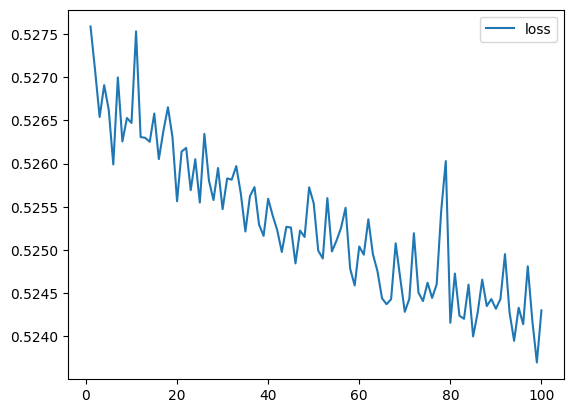

In [47]:

# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")

<Axes: >

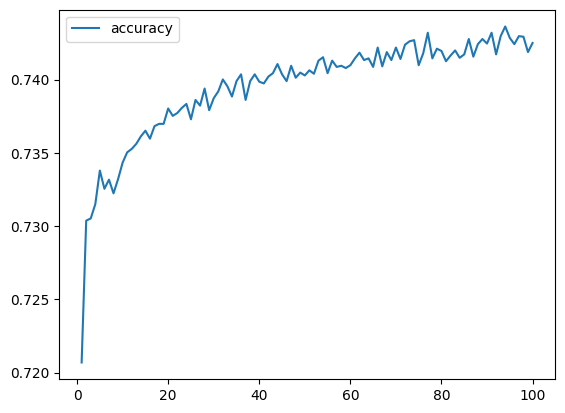

In [32]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [34]:
#Attemp2 3 layers

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="ReLU")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="ReLU"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="ReLU"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 80)                9360      
                                                                 
 dense_7 (Dense)             (None, 30)                2430      
                                                                 
 dense_8 (Dense)             (None, 10)                310       
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 12,111
Trainable params: 12,111
Non-trainable params: 0
_________________________________________________________________


In [40]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [41]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 1ms/step - loss: 0.5276 - accuracy: 0.7428
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5271 - accuracy: 0.7423
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5265 - accuracy: 0.7426
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5269 - accuracy: 0.7434
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5266 - accuracy: 0.7440
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5260 - accuracy: 0.7431
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5270 - accuracy: 0.7431
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5263 - accuracy: 0.7436
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5265 - accuracy: 0.7424
Epoch 10/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5265 - accura

In [42]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5852 - accuracy: 0.7292 - 340ms/epoch - 1ms/step
Loss: 0.5851761102676392, Accuracy: 0.7292128205299377


<Axes: >

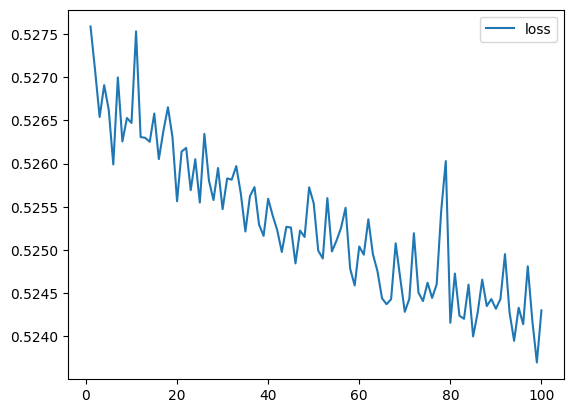

In [48]:

# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")

<Axes: >

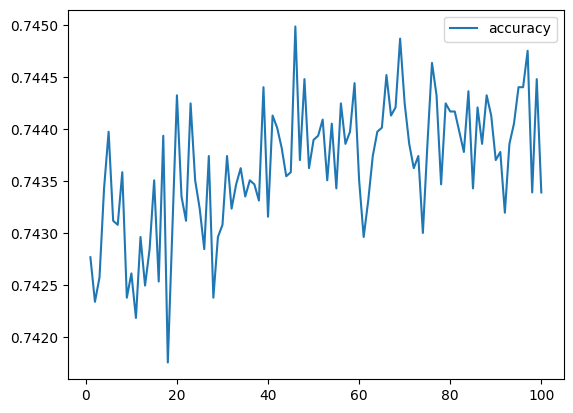

In [49]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [50]:
# Export our model to HDF5 file
nn.save('AlphabetSoupCharity.h5')  
files.download('AlphabetSoupCharity.h5')   

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>